# Analysis on sucides in India 2001 - 12

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Pandora/Downloads/Compressed/suicides-in-india/Suicides in India 2001-2012.csv')

In [3]:
data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [4]:
data.isnull().any()

State        False
Year         False
Type_code    False
Type         False
Gender       False
Age_group    False
Total        False
dtype: bool

In [5]:
g1 = data.groupby( [ "State", "Gender"] ).count().reset_index()

In [6]:
l1=g1.head()
l1


,State,Gender,Year,Type_code,Type,Age_group,Total
0,A & N Islands,Female,3345,3345,3345,3345,3345
1,A & N Islands,Male,3367,3367,3367,3367,3367
2,Andhra Pradesh,Female,3395,3395,3395,3395,3395
3,Andhra Pradesh,Male,3396,3396,3396,3396,3396
4,Arunachal Pradesh,Female,3351,3351,3351,3351,3351


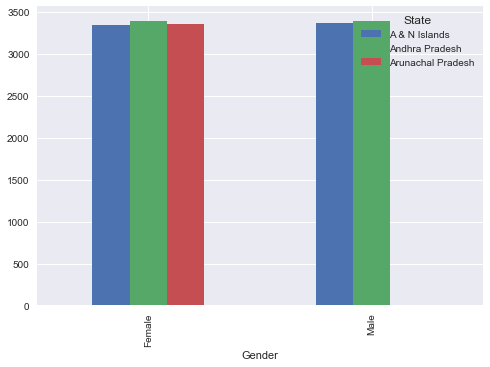

In [7]:
l1.pivot(index='Gender', columns='State', values='Total').plot(kind='bar')

In [8]:
data_grpby_year = data.groupby( [ "Year"] ).sum().reset_index()

In [9]:
data_grpby_year.head()

,Year,Total
0,2001,976464
1,2002,993648
2,2003,997622
3,2004,1023137
4,2005,1025201


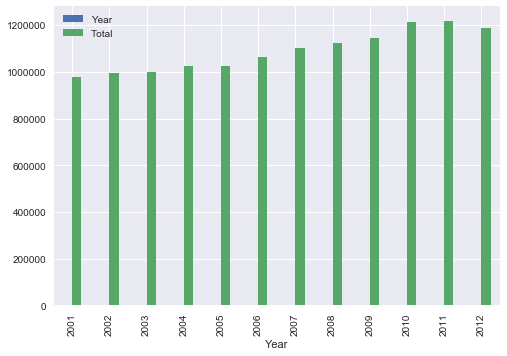

In [10]:
data_grpby_year.plot(kind='bar',x=data_grpby_year["Year"])

In [11]:
#x = g1['Year']
#y1 = g1['Total']

#plt.plot(x,y1)


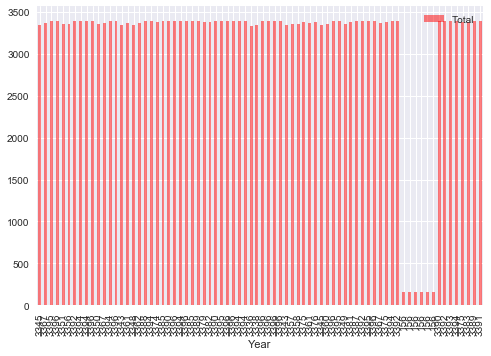

In [12]:
g1.plot(x='Year', y='Total', kind='bar',alpha =0.5,color='r') 

In [13]:
data_grpby_state = data.groupby( [ "State","Year"] ).sum().reset_index()

In [14]:
check = data_grpby_state.groupby(["State"]).sum().reset_index()

In [15]:
check=check.head(10)
check

,State,Year,Total
0,A & N Islands,24078,8109
1,Andhra Pradesh,24078,814059
2,Arunachal Pradesh,24078,6633
3,Assam,24078,172276
4,Bihar,24078,46214
5,Chandigarh,24078,5164
6,Chhattisgarh,24078,302354
7,D & N Haveli,24078,3430
8,Daman & Diu,24078,1391
9,Delhi (Ut),24078,84272


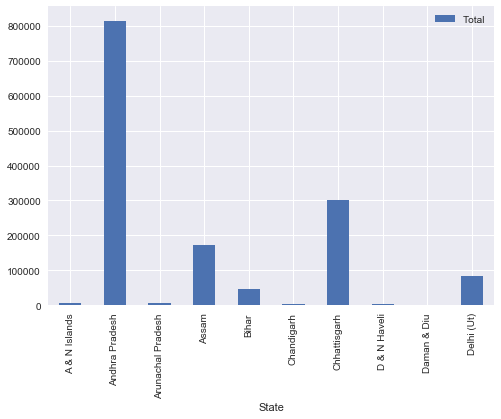

In [16]:
check.plot(x='State',y='Total',kind='bar')

In [17]:
data_col = data[['State','Gender','Year','Total']]

In [18]:
data_col.head()

,State,Gender,Year,Total
0,A & N Islands,Female,2001,0
1,A & N Islands,Female,2001,0
2,A & N Islands,Female,2001,0
3,A & N Islands,Female,2001,0
4,A & N Islands,Female,2001,0


In [19]:
category_group = data_col.groupby(['State','Gender','Year']).sum()
category_group.head(10)

Total
State         Gender Year       
A & N Islands Female 2001    250
                     2002    265
                     2003    215
                     2004    205
                     2005    265
                     2006    185
                     2007    280
                     2008    225
                     2009    225
                     2010    220

In [20]:
category_group.unstack().head()

Total                                            \
Year                       2001   2002   2003   2004   2005   2006   2007   
State             Gender                                                    
A & N Islands     Female    250    265    215    205    265    185    280   
                  Male      395    455    350    405    430    480    495   
Andhra Pradesh    Female  20715  20610  19480  22220  22885  22065  24665   
                  Male    31895  37855  37565  45410  44325  44315  49745   
Arunachal Pradesh Female    175    215    135    150    105    165    154   

                                                             
Year                       2008   2009   2010   2011   2012  
State             Gender                                     
A & N Islands     Female    225    225    220    210    205  
                  Male      489    430    560    470    400  
Andhra Pradesh    Female  23124  23065  24770  24785  23555  
                  Male    48605  49435  54735  50600  47635  
Arunachal Pradesh Female    165    165    200    175    150

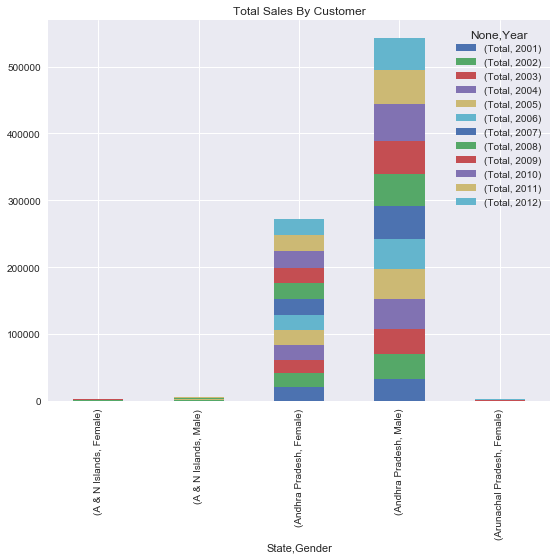

In [21]:
my_plot=category_group.unstack().head().plot(kind='bar',stacked=True,title="Total Sales By Customer",figsize=(9,7))
#my_plot.set_xlabel("Customers")
#my_plot.set_ylabel("Sales")
#my_plot.legend(["Belts","Shirts","Shoes"],loc=9,ncol=4)

In [22]:
data_by_type = data[['State','Type','Year','Total']]

In [23]:
data_by_type.head()

,State,Type,Year,Total
0,A & N Islands,Illness (Aids/STD),2001,0
1,A & N Islands,Bankruptcy or Sudden change in Economic,2001,0
2,A & N Islands,Cancellation/Non-Settlement of Marriage,2001,0
3,A & N Islands,Physical Abuse (Rape/Incest Etc.),2001,0
4,A & N Islands,Dowry Dispute,2001,0


In [24]:
data_groupby_type = data_by_type.groupby(['State','Type','Year']).sum()


In [25]:
data_by_agegroup = data[['Gender','Age_group','Total']]

In [26]:
data_by_agegroup.head()

,Gender,Age_group,Total
0,Female,0-14,0
1,Female,0-14,0
2,Female,0-14,0
3,Female,0-14,0
4,Female,0-14,0


In [27]:
data_groupby_age = data_by_agegroup.groupby(['Gender','Age_group']).sum()
data_groupby_age


Total
Gender Age_group         
Female 0-100+     3144078
       0-14         49436
       15-29       701215
       30-44       477461
       45-59       232542
       60+          98242
Male   0-100+     5591508
       0-14         48974
       15-29       832822
       30-44       994138
       45-59       652635
       60+         248683

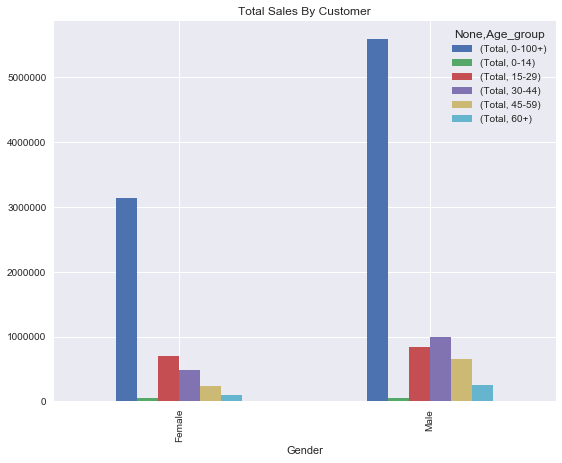

In [28]:
my_plot_2=data_groupby_age.unstack().plot(kind='bar',title="Total Sales By Customer",figsize=(9,7))
